# Redes Neuronales Convolucionales (CNN) para el analisis del comportamiento del pez cebra


Para construir nuestro modelo seguimos los siguientes pasos:

- Cargamos las imagenes de frecuencia (150x268 px) del pez cebra como dataset en formato requerido por keras. 

- Identificar las caracteristicas las cuales emplearemos en el entrenamiento del modelo.

- Useremos redes neuronales para construir nuestro modelo (arquitectura de red base LeNet-5).

- El paso final sería entrenar nuestro modelo y luego probar y validar qué tan bien lo hicimos.


In [ ]:
# Update libraries
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 7.2MB/s 
  Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0


In [ ]:
#Cargamos las librerias necesarias para nuestro trabajo
import numpy as np
import cv2 as cv
import pandas as pd
import random as rd
from time import time

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras #Framework de tensorflow
import keras.layers as layers
from keras import optimizers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
import cv2 as cv

In [ ]:
tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [ ]:
#Importamos nuestros datos:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(150, 268)


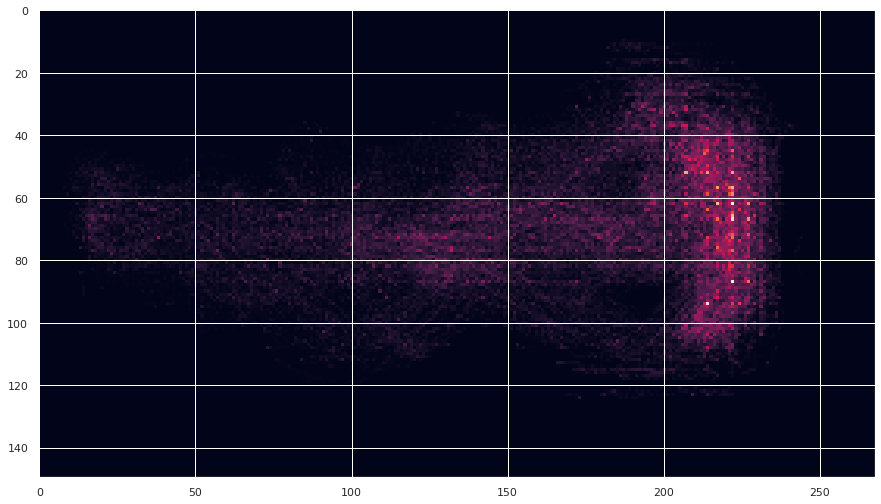

In [ ]:
#Visualizamos nuestros datos (FP,FV,FA).
capa = 1
video = "100-1"
image = np.load("/content/drive/My Drive/ImaClasificacion/capa"+str(capa)+"/"+video+".npy")
plt.figure(figsize=(15,15))
plt.imshow(image)
print(image.shape)

#'/content/drive/My Drive/ImagenesClasificacion/capa1'

In [ ]:
#Ahora construimos el arreglo de datos
datos = []
labels = []

for i in range(21):
  if(i<10):
    for k in range(5):
      image1 = np.load("/content/drive/My Drive/ImaClasificacion/capa1/10"+str(i)+"-"+str(k+1)+".npy")
      image2 = np.load("/content/drive/My Drive/ImaClasificacion/capa2/10"+str(i)+"-"+str(k+1)+".npy")
      image3 = np.load("/content/drive/My Drive/ImaClasificacion/capa3/10"+str(i)+"-"+str(k+1)+".npy")
      dato = np.zeros(shape=(image1.shape[0],image1.shape[1],3)) 
      dato[:,:,0] = image1
      dato[:,:,1] = image2
      dato[:,:,2] = image3
      datos.append(dato)
      if(i<=4):
        labels.append(0)
      else:
        labels.append(1)
  else:
    for k in range(5):
      image1 = np.load("/content/drive/My Drive/ImaClasificacion/capa1/1"+str(i)+"-"+str(k+1)+".npy")
      image2 = np.load("/content/drive/My Drive/ImaClasificacion/capa2/1"+str(i)+"-"+str(k+1)+".npy")
      image3 = np.load("/content/drive/My Drive/ImaClasificacion/capa3/1"+str(i)+"-"+str(k+1)+".npy")
      dato = np.zeros(shape=(image1.shape[0],image1.shape[1],3)) 
      dato[:,:,0] = image1
      dato[:,:,1] = image2
      dato[:,:,2] = image3
      datos.append(dato)
      if(i == 10):
        labels.append(1)
      elif(i <= 16 and i >= 11):
        labels.append(2)
      else:
        labels.append(3)
for k in range(5):
  image1 = np.load("/content/drive/My Drive/ImaClasificacion/capa1/ACL099-"+str(k+1)+".npy")
  image2 = np.load("/content/drive/My Drive/ImaClasificacion/capa2/ACL099-"+str(k+1)+".npy")
  image3 = np.load("/content/drive/My Drive/ImaClasificacion/capa3/ACL099-"+str(k+1)+".npy")
  dato = np.zeros(shape=(image1.shape[0],image1.shape[1],3)) 
  dato[:,:,0] = image1
  dato[:,:,1] = image2
  dato[:,:,2] = image3
  datos.append(dato)
  labels.append(0)

datos = np.array(datos)
labels = np.array(labels)
print(datos.shape)
print(labels.shape)



(110, 150, 268, 3)
(110,)


In [ ]:
print(labels.shape, datos.shape)

(110,) (110, 150, 268, 3)


In [ ]:
estres_test = []
estres_train = []
for i in y_test:
  if (i == 0):
    estres_test.append(0)
  elif (i== 1):
    estres_test.append(0)
  elif (i == 2):
    estres_test.append(10)
  elif (i == 3):
    estres_test.append(100)

for i in y_train:
  if (i == 0):
    estres_train.append(0)
  elif (i== 1):
    estres_train.append(0)
  elif (i == 2):
    estres_train.append(10)
  elif (i == 3):
    estres_train.append(100)

In [ ]:
estres_test = np.array(estres_test)
estres_train = np.array(estres_train)

In [ ]:
#Ahora procedemos a partir los datos
X_train, X_test, y_train, y_test = train_test_split(datos, labels, test_size=0.3, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(77, 150, 268, 3) (33, 150, 268, 3) (77,) (33,)


In [ ]:
#LEAVE ONE OUT
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(datos)
print(loo)

for train_index, test_index in loo.split(datos):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = datos[train_index], datos[test_index]
  y_train, y_test = labels[train_index], labels[test_index]
 # print(X_train, X_test, y_train, y_test)

LeaveOneOut()


# 2 convolucionales + 2POOL+ 3Full


In [ ]:
#Primera arquitectura Lenet (2conv+2pool+3full) para clasificación
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(6, 5, activation='relu')(entrada)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(16, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(120, activation='relu')(x)
x = tf.keras.layers.Dense(84, activation='relu')(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(entrada, x)

In [ ]:
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 146, 264, 6)       456       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 132, 6)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 130, 16)       880       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 35, 65, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 36400)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 120)             

In [ ]:
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
nepochs = 30
tam_lote = 128
history= model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/30
1/1 [==============================] - 0s 251ms/step - loss: 2.0002 - sparse_categorical_accuracy: 0.2468 - val_loss: 12.2182 - val_sparse_categorical_accuracy: 0.2121
Epoch 2/30
1/1 [==============================] - 0s 89ms/step - loss: 10.4996 - sparse_categorical_accuracy: 0.2987 - val_loss: 6.8289 - val_sparse_categorical_accuracy: 0.4242
Epoch 3/30
1/1 [==============================] - 0s 89ms/step - loss: 8.3226 - sparse_categorical_accuracy: 0.3247 - val_loss: 2.9238 - val_sparse_categorical_accuracy: 0.4545
Epoch 4/30
1/1 [==============================] - 0s 81ms/step - loss: 2.3627 - sparse_categorical_accuracy: 0.4805 - val_loss: 1.9404 - val_sparse_categorical_accuracy: 0.3636
Epoch 5/30
1/1 [==============================] - 0s 78ms/step - loss: 1.0178 - sparse_categorical_accuracy: 0.6234 - val_loss: 2.2661 - val_sparse_categorical_accuracy: 0.3939
Epoch 6/30
1/1 [==============================] - 0s 87ms/step - loss: 1.0725 - sparse_categorical_accuracy: 0.6

1.0 0.8787878751754761


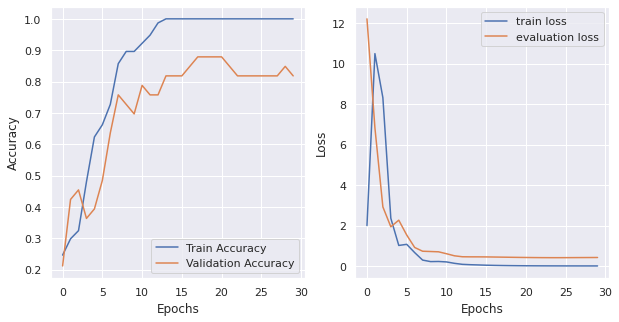

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
#Aqui guardamos los modelos propuestos LENET-5
model.save('/content/drive/My Drive/Colab Notebooks/Lenet5_Final.h5')

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Lenet5_Final.h5')

In [ ]:
model.predict(np.r_[[X_test[0]]])

array([[3.6345033e-03, 2.6102047e-02, 1.9439367e-05, 9.7024405e-01]],
      dtype=float32)

In [ ]:
print(y_test[0])

3


Mismo modelo pero esta vez como un problema de regresión

In [ ]:
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(6, 5, activation='relu')(entrada)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(16, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(120, activation='relu')(x)
x = tf.keras.layers.Dense(84, activation='relu')(x)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(entrada, x)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 146, 264, 6)       456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 132, 6)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 130, 16)       880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 65, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 36400)             0         
_________________________________________________________________
dense (Dense)                (None, 120)              

In [ ]:
#Funcion de perdida: Error cuadratico medio logaritmico
#Optimizador: Adam
#Metricas: Error ...
model.compile(loss=tf.keras.losses.MeanSquaredLogarithmicError(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001), 
              metrics=[tf.keras.metrics.MeanSquaredLogarithmicError()])

In [ ]:
nepochs = 70
tam_lote = 128
history= model.fit(X_train, y_train, epochs=nepochs, batch_size=tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/70
1/1 [==============================] - 0s 82ms/step - loss: 0.9822 - mean_squared_logarithmic_error: 0.9822 - val_loss: 1.6633 - val_mean_squared_logarithmic_error: 1.6633
Epoch 2/70
1/1 [==============================] - 0s 51ms/step - loss: 0.9389 - mean_squared_logarithmic_error: 0.9389 - val_loss: 1.6660 - val_mean_squared_logarithmic_error: 1.6660
Epoch 3/70
1/1 [==============================] - 0s 52ms/step - loss: 0.9040 - mean_squared_logarithmic_error: 0.9040 - val_loss: 1.6628 - val_mean_squared_logarithmic_error: 1.6628
Epoch 4/70
1/1 [==============================] - 0s 50ms/step - loss: 0.8697 - mean_squared_logarithmic_error: 0.8697 - val_loss: 1.6473 - val_mean_squared_logarithmic_error: 1.6473
Epoch 5/70
1/1 [==============================] - 0s 47ms/step - loss: 0.8360 - mean_squared_logarithmic_error: 0.8360 - val_loss: 1.6229 - val_mean_squared_logarithmic_error: 1.6229
Epoch 6/70
1/1 [==============================] - 0s 53ms/step - loss: 0.8054 - mean_

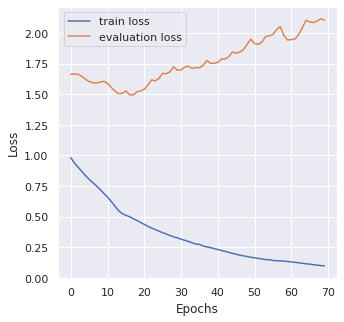

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

## Resultados Regression 2Conv


In [ ]:
for i in range(y_test.shape[0]):
  if (y_test[i]==0):
    prediccion = model.predict(np.r_[[X_test[i]]])
    print("Clase control, estres absorbido:",prediccion)
  elif (y_test[i]==1):
    prediccion = model.predict(np.r_[[X_test[i]]])
    print("Clase Estres0, estres absorbido:",prediccion)
  elif (y_test[i]==2):
    prediccion = model.predict(np.r_[[X_test[i]]])
    print("Clase Estres10, estres absorbido:",prediccion)
  elif (y_test[i]==3):
    prediccion = model.predict(np.r_[[X_test[i]]])
    print("Clase Estres100, estres absorbido:",prediccion)

Clase control, estres absorbido: [[8.098375]]
Clase control, estres absorbido: [[-2.6726713]]
Clase control, estres absorbido: [[-25.295763]]
Clase control, estres absorbido: [[-22.289688]]
Clase control, estres absorbido: [[-19.3915]]
Clase control, estres absorbido: [[4.2487597]]
Clase control, estres absorbido: [[-26.201666]]
Clase control, estres absorbido: [[17.24299]]
Clase control, estres absorbido: [[3.3376894]]
Clase control, estres absorbido: [[-4.1427064]]
Clase control, estres absorbido: [[-10.189553]]
Clase control, estres absorbido: [[9.3966]]
Clase control, estres absorbido: [[-0.8712378]]
Clase control, estres absorbido: [[32.141876]]
Clase control, estres absorbido: [[7.8229227]]
Clase control, estres absorbido: [[-7.3110437]]
Clase control, estres absorbido: [[4.832686]]
Clase control, estres absorbido: [[9.57766]]
Clase control, estres absorbido: [[-1.4353938]]
Clase control, estres absorbido: [[24.710865]]
Clase control, estres absorbido: [[-10.45469]]
Clase control

In [ ]:
y_predict = []
for k in range(X_test.shape[0]):
  prediccion = model.predict(np.r_[[X_test[k]]])
  mayor = prediccion[0][0]
  label = 0 
  for i in range(3):
    if(prediccion[0][i+1]>mayor):
      mayor = prediccion[0][i+1]
      label = i+1
  y_predict.append(label)

In [ ]:
y_predict = list(y_predict)

# 4 Convolucionales + 2Pool+ 3Full

In [ ]:
#Segunda arquitectura (4conv + 2Pool + 2Full)
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(entrada)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(entrada, x)
model.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 150, 268, 32)      896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 150, 268, 32)      9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 75, 134, 32)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 75, 134, 64)       18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 75, 134, 64)       36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 37, 67, 64)      

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
#Entrenamiento
nepochs = 50
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))


Epoch 1/50
1/1 [==============================] - 1s 521ms/step - loss: 1.3670 - sparse_categorical_accuracy: 0.3506 - val_loss: 28.0437 - val_sparse_categorical_accuracy: 0.2121
Epoch 2/50
1/1 [==============================] - 0s 305ms/step - loss: 23.0612 - sparse_categorical_accuracy: 0.2987 - val_loss: 2.1669 - val_sparse_categorical_accuracy: 0.4848
Epoch 3/50
1/1 [==============================] - 0s 296ms/step - loss: 2.4125 - sparse_categorical_accuracy: 0.5065 - val_loss: 1.2662 - val_sparse_categorical_accuracy: 0.5152
Epoch 4/50
1/1 [==============================] - 0s 297ms/step - loss: 1.3581 - sparse_categorical_accuracy: 0.4805 - val_loss: 1.1042 - val_sparse_categorical_accuracy: 0.4848
Epoch 5/50
1/1 [==============================] - 0s 297ms/step - loss: 0.9697 - sparse_categorical_accuracy: 0.4545 - val_loss: 1.0846 - val_sparse_categorical_accuracy: 0.5152
Epoch 6/50
1/1 [==============================] - 0s 297ms/step - loss: 0.9412 - sparse_categorical_accuracy

1.0 0.8484848737716675


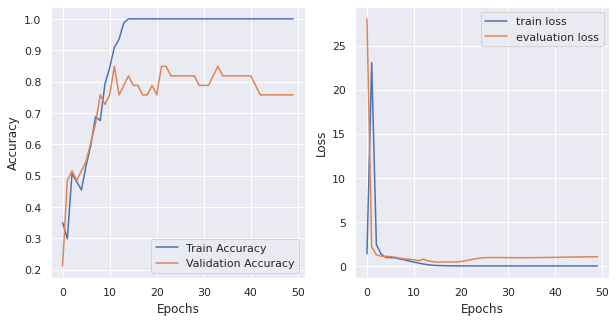

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

1.0 0.8484848737716675


In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/4Conv.h5')

Ahora con regression 

In [ ]:
#Segunda arquitectura (4conv + 2Pool + 2Full)
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(entrada)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dense(1, activation='linear')(x)
model = tf.keras.Model(entrada, x)
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 150, 268, 32)      896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 150, 268, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 134, 32)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 75, 134, 64)       18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 75, 134, 64)       36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 67, 64)       

In [ ]:
model

In [ ]:
#Funcion de perdida: Error cuadratico medio logaritmico
#Optimizador: Adam
#Metricas: Error ...
model.compile(loss=tf.keras.losses.MeanSquaredLogarithmicError(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001), 
              metrics=[tf.keras.metrics.MeanSquaredLogarithmicError()])

In [ ]:
#Entrenamiento
nepochs = 70
tam_lote = 128
history = model.fit(X_train, estres_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, estres_test))

Epoch 1/70
1/1 [==============================] - 0s 351ms/step - loss: 5.4202 - mean_squared_logarithmic_error: 5.4202 - val_loss: 4.4382 - val_mean_squared_logarithmic_error: 4.4382
Epoch 2/70
1/1 [==============================] - 0s 161ms/step - loss: 4.4867 - mean_squared_logarithmic_error: 4.4867 - val_loss: 4.7179 - val_mean_squared_logarithmic_error: 4.7179
Epoch 3/70
1/1 [==============================] - 0s 165ms/step - loss: 4.6827 - mean_squared_logarithmic_error: 4.6827 - val_loss: 4.5806 - val_mean_squared_logarithmic_error: 4.5806
Epoch 4/70
1/1 [==============================] - 0s 164ms/step - loss: 4.4768 - mean_squared_logarithmic_error: 4.4768 - val_loss: 4.2666 - val_mean_squared_logarithmic_error: 4.2666
Epoch 5/70
1/1 [==============================] - 0s 165ms/step - loss: 4.0566 - mean_squared_logarithmic_error: 4.0566 - val_loss: 3.8786 - val_mean_squared_logarithmic_error: 3.8786
Epoch 6/70
1/1 [==============================] - 0s 164ms/step - loss: 3.5305 -

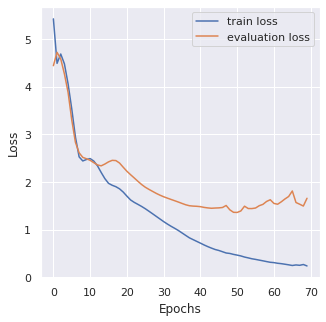

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

## Regression Resultados 4conv

In [ ]:
for i in range(y_test.shape[0]):
  if (y_test[i]==0):
    prediccion = model.predict(np.r_[[X_test[i]]])
    print("Clase control, estres absorbido:",prediccion)
  elif (y_test[i]==1):
    prediccion = model.predict(np.r_[[X_test[i]]])
    print("Clase Estres0, estres absorbido:",prediccion)
  elif (y_test[i]==2):
    prediccion = model.predict(np.r_[[X_test[i]]])
    print("Clase Estres10, estres absorbido:",prediccion)
  elif (y_test[i]==3):
    prediccion = model.predict(np.r_[[X_test[i]]])
    print("Clase Estres100, estres absorbido:",prediccion)

Clase Estres100, estres absorbido: [[46.99263]]
Clase control, estres absorbido: [[5.2232876]]
Clase Estres10, estres absorbido: [[-1.3281008]]
Clase control, estres absorbido: [[0.6181666]]
Clase control, estres absorbido: [[-22.536942]]
Clase Estres100, estres absorbido: [[24.671083]]
Clase control, estres absorbido: [[-14.241487]]
Clase control, estres absorbido: [[-15.015493]]
Clase control, estres absorbido: [[7.468023]]
Clase Estres100, estres absorbido: [[39.482815]]
Clase Estres10, estres absorbido: [[29.32338]]
Clase control, estres absorbido: [[-14.418978]]
Clase Estres0, estres absorbido: [[14.889767]]
Clase Estres10, estres absorbido: [[16.09134]]
Clase Estres10, estres absorbido: [[4.10115]]
Clase Estres0, estres absorbido: [[-3.559071]]
Clase control, estres absorbido: [[-10.75354]]
Clase Estres10, estres absorbido: [[11.480541]]
Clase Estres100, estres absorbido: [[35.334328]]
Clase Estres0, estres absorbido: [[-14.593466]]
Clase control, estres absorbido: [[4.5823627]]


# 6 convolucionales + 3Pool + 2Full

In [ ]:
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(entrada)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(entrada, x)
model.summary()

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 150, 268, 32)      896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 150, 268, 32)      9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 75, 134, 32)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 75, 134, 64)       18496     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 75, 134, 64)       36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 37, 67, 64)      

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
#Entrenamiento
nepochs = 70
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))


Epoch 1/70
1/1 [==============================] - 1s 602ms/step - loss: 2.4227 - sparse_categorical_accuracy: 0.0519 - val_loss: 4.3100 - val_sparse_categorical_accuracy: 0.2424
Epoch 2/70
1/1 [==============================] - 0s 375ms/step - loss: 3.2677 - sparse_categorical_accuracy: 0.3896 - val_loss: 3.4323 - val_sparse_categorical_accuracy: 0.3636
Epoch 3/70
1/1 [==============================] - 0s 378ms/step - loss: 4.3436 - sparse_categorical_accuracy: 0.2338 - val_loss: 1.6744 - val_sparse_categorical_accuracy: 0.2424
Epoch 4/70
1/1 [==============================] - 0s 377ms/step - loss: 1.7469 - sparse_categorical_accuracy: 0.3117 - val_loss: 1.5658 - val_sparse_categorical_accuracy: 0.2121
Epoch 5/70
1/1 [==============================] - 0s 375ms/step - loss: 1.4026 - sparse_categorical_accuracy: 0.3117 - val_loss: 1.5460 - val_sparse_categorical_accuracy: 0.2121
Epoch 6/70
1/1 [==============================] - 0s 375ms/step - loss: 1.2679 - sparse_categorical_accuracy: 

1.0 0.8787878751754761


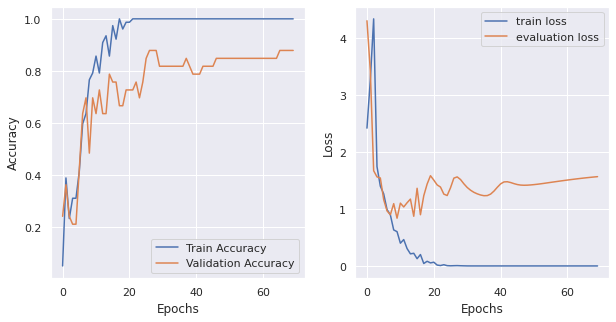

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/6Conv.h5')

In [ ]:
#Tercera arquitectura (6convolucionales)
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(entrada)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(entrada, x)
model.summary()

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 150, 268, 32)      896       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 150, 268, 32)      9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 75, 134, 32)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 75, 134, 64)       18496     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 75, 134, 64)       36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 37, 67, 64)      

In [ ]:
model.compile(loss=tf.keras.losses.MeanSquaredLogarithmicError(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001), 
              metrics=[tf.keras.metrics.MeanSquaredLogarithmicError()])

In [ ]:
nepochs = 70
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/70
1/1 [==============================] - 0s 387ms/step - loss: 0.8130 - mean_squared_logarithmic_error: 0.8130 - val_loss: 0.4673 - val_mean_squared_logarithmic_error: 0.4673
Epoch 2/70
1/1 [==============================] - 0s 201ms/step - loss: 0.3722 - mean_squared_logarithmic_error: 0.3722 - val_loss: 0.3807 - val_mean_squared_logarithmic_error: 0.3807
Epoch 3/70
1/1 [==============================] - 0s 204ms/step - loss: 0.2932 - mean_squared_logarithmic_error: 0.2932 - val_loss: 0.2851 - val_mean_squared_logarithmic_error: 0.2851
Epoch 4/70
1/1 [==============================] - 0s 200ms/step - loss: 0.2310 - mean_squared_logarithmic_error: 0.2310 - val_loss: 0.2436 - val_mean_squared_logarithmic_error: 0.2436
Epoch 5/70
1/1 [==============================] - 0s 208ms/step - loss: 0.2129 - mean_squared_logarithmic_error: 0.2129 - val_loss: 0.2161 - val_mean_squared_logarithmic_error: 0.2161
Epoch 6/70
1/1 [==============================] - 0s 198ms/step - loss: 0.1836 -

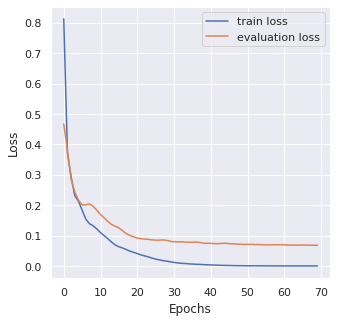

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

## Resultados Regression 6Conv

In [ ]:
for i in range(y_test.shape[0]):
  if (y_test[i]==0):
    prediccion = model.predict(np.r_[[X_test[i]]])
    print("Clase control, estres absorbido:",prediccion)
  elif (y_test[i]==1):
    prediccion = model.predict(np.r_[[X_test[i]]])
    print("Clase Estres0, estres absorbido:",prediccion)
  elif (y_test[i]==2):
    prediccion = model.predict(np.r_[[X_test[i]]])
    print("Clase Estres10, estres absorbido:",prediccion)
  elif (y_test[i]==3):
    prediccion = model.predict(np.r_[[X_test[i]]])
    print("Clase Estres100, estres absorbido:",prediccion)

Clase Estres100, estres absorbido: [[2.7123952]]
Clase control, estres absorbido: [[0.5918706]]
Clase Estres10, estres absorbido: [[1.9580715]]
Clase control, estres absorbido: [[-0.272514]]
Clase control, estres absorbido: [[-0.84953505]]
Clase Estres100, estres absorbido: [[1.5519903]]
Clase control, estres absorbido: [[-0.7687027]]
Clase control, estres absorbido: [[-0.17166643]]
Clase control, estres absorbido: [[0.98021644]]
Clase Estres100, estres absorbido: [[3.623574]]
Clase Estres10, estres absorbido: [[2.4469566]]
Clase control, estres absorbido: [[-0.05653394]]
Clase Estres0, estres absorbido: [[2.0078802]]
Clase Estres10, estres absorbido: [[2.1197374]]
Clase Estres10, estres absorbido: [[2.121044]]
Clase Estres0, estres absorbido: [[0.74705166]]
Clase control, estres absorbido: [[0.2421631]]
Clase Estres10, estres absorbido: [[1.5761331]]
Clase Estres100, estres absorbido: [[2.4827302]]
Clase Estres0, estres absorbido: [[-0.49761176]]
Clase control, estres absorbido: [[-0.

# 8 convolucionales + 4Pool + 2Full

In [ ]:
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(entrada)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(entrada, x)
model.summary()

Model: "functional_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 150, 268, 32)      896       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 150, 268, 32)      9248      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 75, 134, 32)       0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 75, 134, 64)       18496     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 75, 134, 64)       36928     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 37, 67, 64)      

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
#Entrenamiento
nepochs = 30
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/30
1/1 [==============================] - 1s 655ms/step - loss: 2.3512 - sparse_categorical_accuracy: 0.0260 - val_loss: 1.7610 - val_sparse_categorical_accuracy: 0.3636
Epoch 2/30
1/1 [==============================] - 0s 429ms/step - loss: 1.6837 - sparse_categorical_accuracy: 0.2597 - val_loss: 2.1402 - val_sparse_categorical_accuracy: 0.2424
Epoch 3/30
1/1 [==============================] - 0s 432ms/step - loss: 1.9190 - sparse_categorical_accuracy: 0.2857 - val_loss: 1.9338 - val_sparse_categorical_accuracy: 0.2727
Epoch 4/30
1/1 [==============================] - 0s 425ms/step - loss: 1.8027 - sparse_categorical_accuracy: 0.3636 - val_loss: 1.9901 - val_sparse_categorical_accuracy: 0.2727
Epoch 5/30
1/1 [==============================] - 0s 432ms/step - loss: 1.5463 - sparse_categorical_accuracy: 0.4156 - val_loss: 1.5233 - val_sparse_categorical_accuracy: 0.2121
Epoch 6/30
1/1 [==============================] - 0s 426ms/step - loss: 1.2833 - sparse_categorical_accuracy: 

1.0 0.8787878751754761


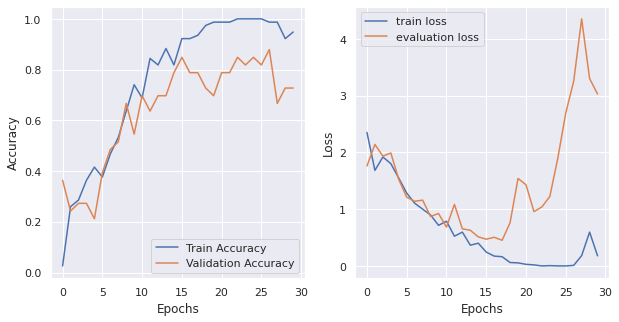

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/8Conv.h5')

In [ ]:
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(entrada)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(entrada, x)
model.summary()

Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 150, 268, 32)      896       
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 150, 268, 32)      9248      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 75, 134, 32)       0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 75, 134, 64)       18496     
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 75, 134, 64)       36928     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 37, 67, 64)      

In [ ]:
model.compile(loss=tf.keras.losses.MeanSquaredLogarithmicError(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001), 
              metrics=[tf.keras.metrics.MeanSquaredLogarithmicError()])

In [ ]:
nepochs = 70
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/70
1/1 [==============================] - 0s 408ms/step - loss: 0.7238 - mean_squared_logarithmic_error: 0.7238 - val_loss: 0.5028 - val_mean_squared_logarithmic_error: 0.5028
Epoch 2/70
1/1 [==============================] - 0s 224ms/step - loss: 0.4050 - mean_squared_logarithmic_error: 0.4050 - val_loss: 0.4976 - val_mean_squared_logarithmic_error: 0.4976
Epoch 3/70
1/1 [==============================] - 0s 227ms/step - loss: 0.4023 - mean_squared_logarithmic_error: 0.4023 - val_loss: 0.3973 - val_mean_squared_logarithmic_error: 0.3973
Epoch 4/70
1/1 [==============================] - 0s 232ms/step - loss: 0.3206 - mean_squared_logarithmic_error: 0.3206 - val_loss: 0.3226 - val_mean_squared_logarithmic_error: 0.3226
Epoch 5/70
1/1 [==============================] - 0s 225ms/step - loss: 0.2652 - mean_squared_logarithmic_error: 0.2652 - val_loss: 0.2890 - val_mean_squared_logarithmic_error: 0.2890
Epoch 6/70
1/1 [==============================] - 0s 223ms/step - loss: 0.2505 -

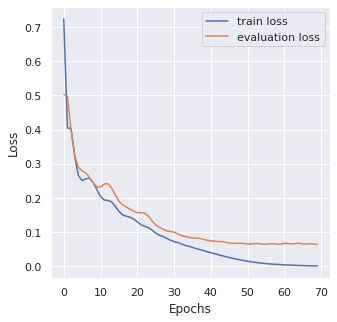

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

## Resultados Regression 8Conv

In [ ]:
for i in range(y_test.shape[0]):
  if (y_test[i]==0):
    prediccion = model.predict(np.r_[[X_test[i]]])
    print("Clase control, estres absorbido:",prediccion)
  elif (y_test[i]==1):
    prediccion = model.predict(np.r_[[X_test[i]]])
    print("Clase Estres0, estres absorbido:",prediccion)
  elif (y_test[i]==2):
    prediccion = model.predict(np.r_[[X_test[i]]])
    print("Clase Estres10, estres absorbido:",prediccion)
  elif (y_test[i]==3):
    prediccion = model.predict(np.r_[[X_test[i]]])
    print("Clase Estres100, estres absorbido:",prediccion)

Clase Estres100, estres absorbido: [[3.0121825]]
Clase control, estres absorbido: [[0.26479286]]
Clase Estres10, estres absorbido: [[2.1104023]]
Clase control, estres absorbido: [[0.08057366]]
Clase control, estres absorbido: [[0.03969074]]
Clase Estres100, estres absorbido: [[1.7145851]]
Clase control, estres absorbido: [[0.01743482]]
Clase control, estres absorbido: [[0.17149948]]
Clase control, estres absorbido: [[0.8223813]]
Clase Estres100, estres absorbido: [[3.8773687]]
Clase Estres10, estres absorbido: [[2.5380757]]
Clase control, estres absorbido: [[0.15555008]]
Clase Estres0, estres absorbido: [[1.9614234]]
Clase Estres10, estres absorbido: [[1.7257637]]
Clase Estres10, estres absorbido: [[2.3683145]]
Clase Estres0, estres absorbido: [[0.9006465]]
Clase control, estres absorbido: [[0.517238]]
Clase Estres10, estres absorbido: [[1.5540093]]
Clase Estres100, estres absorbido: [[2.8913655]]
Clase Estres0, estres absorbido: [[0.15238248]]
Clase control, estres absorbido: [[0.0557

In [ ]:
model.save_weights('regression.h5')

In [ ]:
#PRUEBAS VARIANDO PARAMETROS (Por lo visto lo que funciona mejor son arquitecturas pequeñas)

In [ ]:
#Inicializacion del kernel
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(entrada)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='he_uniform')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(entrada, x)
model.summary()


Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 150, 268, 32)      896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 150, 268, 32)      9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 134, 32)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 75, 134, 64)       18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 75, 134, 64)       36928     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 75, 134, 128)    

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
#Entrenamiento
nepochs = 70
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/70
1/1 [==============================] - 2s 2s/step - loss: 6.4677 - sparse_categorical_accuracy: 0.1970 - val_loss: 13.8810 - val_sparse_categorical_accuracy: 0.2727
Epoch 2/70
1/1 [==============================] - 1s 607ms/step - loss: 10.1027 - sparse_categorical_accuracy: 0.5000 - val_loss: 70.4341 - val_sparse_categorical_accuracy: 0.4091
Epoch 3/70
1/1 [==============================] - 1s 603ms/step - loss: 76.7023 - sparse_categorical_accuracy: 0.3182 - val_loss: 40.7751 - val_sparse_categorical_accuracy: 0.2500
Epoch 4/70
1/1 [==============================] - 1s 610ms/step - loss: 37.6777 - sparse_categorical_accuracy: 0.3333 - val_loss: 27.2692 - val_sparse_categorical_accuracy: 0.3864
Epoch 5/70
1/1 [==============================] - 1s 610ms/step - loss: 13.9420 - sparse_categorical_accuracy: 0.5606 - val_loss: 31.1367 - val_sparse_categorical_accuracy: 0.3182
Epoch 6/70
1/1 [==============================] - 1s 616ms/step - loss: 15.8345 - sparse_categorical_acc

1.0 0.75


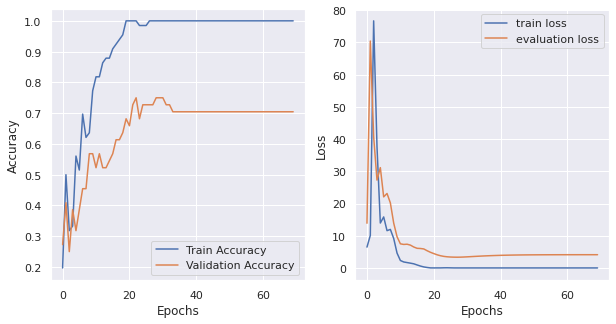

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
#Arquitectura 4
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(entrada)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, kernel_initializer='glorot_uniform', bias_initializer='he_uniform',  activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(entrada, x)
model.summary()

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 150, 268, 32)      896       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 150, 268, 32)      9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 75, 134, 32)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 134, 32)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 75, 134, 64)       18496     
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 75, 134, 64)     

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
nepochs = 70
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/70
1/1 [==============================] - 1s 820ms/step - loss: 25.7794 - sparse_categorical_accuracy: 0.0303 - val_loss: 44.6835 - val_sparse_categorical_accuracy: 0.3182
Epoch 2/70
1/1 [==============================] - 1s 623ms/step - loss: 67.4794 - sparse_categorical_accuracy: 0.2424 - val_loss: 31.5866 - val_sparse_categorical_accuracy: 0.3409
Epoch 3/70
1/1 [==============================] - 1s 616ms/step - loss: 31.3942 - sparse_categorical_accuracy: 0.4242 - val_loss: 35.5588 - val_sparse_categorical_accuracy: 0.2727
Epoch 4/70
1/1 [==============================] - 1s 622ms/step - loss: 37.7866 - sparse_categorical_accuracy: 0.4394 - val_loss: 29.0429 - val_sparse_categorical_accuracy: 0.3864
Epoch 5/70
1/1 [==============================] - 1s 626ms/step - loss: 30.9594 - sparse_categorical_accuracy: 0.4091 - val_loss: 17.8753 - val_sparse_categorical_accuracy: 0.2727
Epoch 6/70
1/1 [==============================] - 1s 620ms/step - loss: 24.7329 - sparse_categorical

1.0 0.8409090638160706


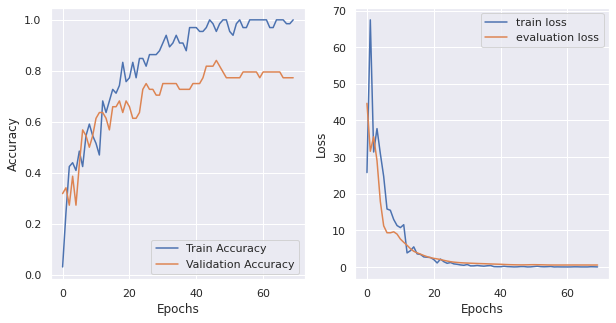

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
entrada = tf.keras.Input((150,268,3))
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(entrada)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, kernel_initializer='glorot_uniform', bias_initializer='he_uniform',  activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(entrada, x)
model.summary()

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 150, 268, 32)      896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 150, 268, 32)      128       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 150, 268, 32)      9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 150, 268, 32)      128       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 75, 134, 32)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 75, 134, 32)     

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
nepochs = 70
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/70
1/1 [==============================] - 1s 1s/step - loss: 3.8709 - sparse_categorical_accuracy: 0.1212 - val_loss: 26.0558 - val_sparse_categorical_accuracy: 0.3864
Epoch 2/70
1/1 [==============================] - 1s 728ms/step - loss: 10.3509 - sparse_categorical_accuracy: 0.3182 - val_loss: 37.5858 - val_sparse_categorical_accuracy: 0.3182
Epoch 3/70
1/1 [==============================] - 1s 726ms/step - loss: 18.0834 - sparse_categorical_accuracy: 0.3939 - val_loss: 41.5177 - val_sparse_categorical_accuracy: 0.2727
Epoch 4/70
1/1 [==============================] - 1s 723ms/step - loss: 18.0987 - sparse_categorical_accuracy: 0.4545 - val_loss: 26.4593 - val_sparse_categorical_accuracy: 0.3636
Epoch 5/70
1/1 [==============================] - 1s 737ms/step - loss: 12.4662 - sparse_categorical_accuracy: 0.4697 - val_loss: 14.1801 - val_sparse_categorical_accuracy: 0.4773
Epoch 6/70
1/1 [==============================] - 1s 727ms/step - loss: 3.7800 - sparse_categorical_accu

1.0 0.5454545617103577


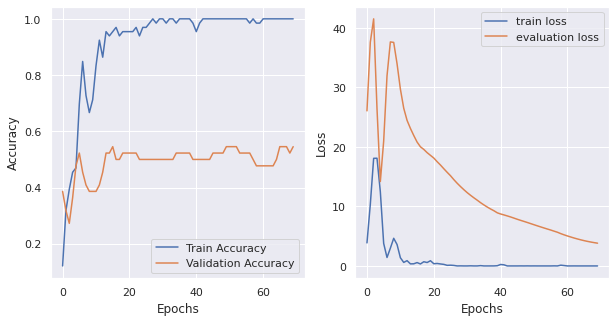

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[14,  0,  0,  0],
       [ 1,  8,  0,  1],
       [ 1,  2, 10,  0],
       [ 0,  0,  2,  5]])

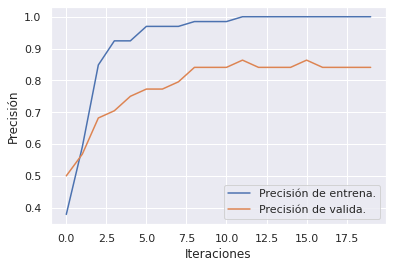

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'], label='Precisión de entrena.')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Precisión de valida.')
plt.xlabel('Iteraciones')
plt.ylabel('Precisión')
plt.legend() 
plt.savefig('presicion-modelo.jpg')

In [ ]:
!sudo apt-get install libhdf5-serial-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libhdf5-serial-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 2,898 B of archives.
After this operation, 37.9 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libhdf5-serial-dev all 1.10.0-patch1+docs-4 [2,898 B]
Fetched 2,898 B in 0s (7,520 B/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libhdf5-serial-dev.
(Reading data

In [ ]:
#Implementación VGG16
entrada = tf.keras.Input((150,268,3)) #Entrada
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same")(entrada)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(512, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.Conv2D(512, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.Conv2D(512, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(512, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.Conv2D(512, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.Conv2D(512, 3, activation='relu', padding="same")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(entrada, x)

In [ ]:
model.summary()

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 150, 268, 3)]     0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 150, 268, 64)      1792      
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 150, 268, 64)      36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 75, 134, 64)       0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 75, 134, 128)      73856     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 75, 134, 128)      147584    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 37, 67, 128)     

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
#Entrenamiento
nepochs = 70
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/70
1/1 [==============================] - 1s 852ms/step - loss: 1.3862 - sparse_categorical_accuracy: 0.2576 - val_loss: 1.3473 - val_sparse_categorical_accuracy: 0.2500
Epoch 2/70
1/1 [==============================] - 1s 693ms/step - loss: 1.3289 - sparse_categorical_accuracy: 0.4091 - val_loss: 1.2324 - val_sparse_categorical_accuracy: 0.2500
Epoch 3/70
1/1 [==============================] - 1s 686ms/step - loss: 1.1714 - sparse_categorical_accuracy: 0.5000 - val_loss: 1.1884 - val_sparse_categorical_accuracy: 0.4318
Epoch 4/70
1/1 [==============================] - 1s 689ms/step - loss: 1.0818 - sparse_categorical_accuracy: 0.4697 - val_loss: 1.3717 - val_sparse_categorical_accuracy: 0.3182
Epoch 5/70
1/1 [==============================] - 1s 689ms/step - loss: 1.2000 - sparse_categorical_accuracy: 0.4545 - val_loss: 1.1225 - val_sparse_categorical_accuracy: 0.5227
Epoch 6/70
1/1 [==============================] - 1s 697ms/step - loss: 1.0466 - sparse_categorical_accuracy: 

1.0 0.8181818127632141


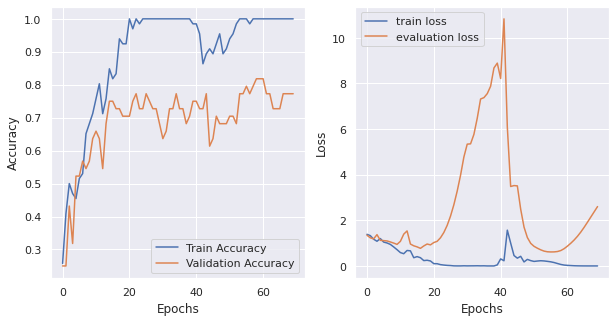

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

1.0 0.8181818127632141


In [ ]:
model.layers[22].get_config()#['name']

{'activation': 'softmax',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'name': 'predictions',
 'trainable': True,
 'units': 4,
 'use_bias': True}

# VGG16

In [ ]:
from keras.applications import vgg16
model = vgg16.VGG16(include_top=True, weights=None, input_tensor=None, input_shape=(150,268,3), pooling=None, classes=4)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 150, 268, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 268, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 268, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 134, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 134, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 134, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 67, 128)       0     

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
#Entrenamiento
nepochs = 70
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/70
1/1 [==============================] - 2s 2s/step - loss: 1.3855 - sparse_categorical_accuracy: 0.3117 - val_loss: 1.3787 - val_sparse_categorical_accuracy: 0.3030
Epoch 2/70
1/1 [==============================] - 2s 2s/step - loss: 1.3394 - sparse_categorical_accuracy: 0.4935 - val_loss: 1.4197 - val_sparse_categorical_accuracy: 0.2727
Epoch 3/70
1/1 [==============================] - 2s 2s/step - loss: 1.2691 - sparse_categorical_accuracy: 0.4935 - val_loss: 1.1851 - val_sparse_categorical_accuracy: 0.5152
Epoch 4/70
1/1 [==============================] - 2s 2s/step - loss: 1.1535 - sparse_categorical_accuracy: 0.5195 - val_loss: 1.0655 - val_sparse_categorical_accuracy: 0.5455
Epoch 5/70
1/1 [==============================] - 2s 2s/step - loss: 0.9628 - sparse_categorical_accuracy: 0.7013 - val_loss: 1.0047 - val_sparse_categorical_accuracy: 0.4545
Epoch 6/70
1/1 [==============================] - 2s 2s/step - loss: 0.7812 - sparse_categorical_accuracy: 0.6753 - val_loss:

1.0 0.8181818127632141


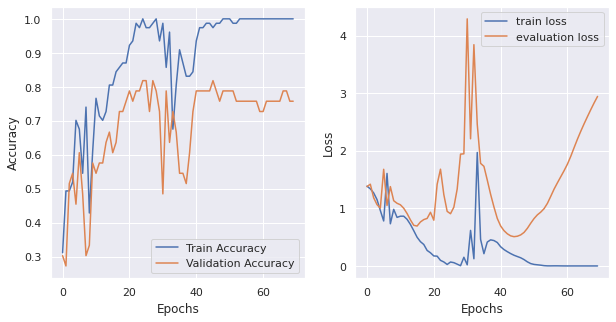

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/VGG16.h5')

# VGG19

In [ ]:
from keras.applications import vgg19
model = vgg19.VGG19(include_top=True, weights=None, input_tensor=None, input_shape=(150,268,3), pooling=None, classes=4)

In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 150, 268, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 268, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 268, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 134, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 134, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 134, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 67, 128)       0     

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
#Entrenamiento
nepochs = 70
tam_lote = 128
history = model.fit(X_train, y_train, epochs = nepochs, batch_size = tam_lote, verbose=1 , validation_data=(X_test, y_test))

Epoch 1/70
1/1 [==============================] - 2s 2s/step - loss: 1.3866 - sparse_categorical_accuracy: 0.2078 - val_loss: 1.3831 - val_sparse_categorical_accuracy: 0.2424
Epoch 2/70
1/1 [==============================] - 2s 2s/step - loss: 1.3687 - sparse_categorical_accuracy: 0.3506 - val_loss: 1.4287 - val_sparse_categorical_accuracy: 0.2424
Epoch 3/70
1/1 [==============================] - 2s 2s/step - loss: 1.3169 - sparse_categorical_accuracy: 0.3636 - val_loss: 1.2987 - val_sparse_categorical_accuracy: 0.3333
Epoch 4/70
1/1 [==============================] - 2s 2s/step - loss: 1.2362 - sparse_categorical_accuracy: 0.5584 - val_loss: 1.1370 - val_sparse_categorical_accuracy: 0.4545
Epoch 5/70
1/1 [==============================] - 2s 2s/step - loss: 1.0399 - sparse_categorical_accuracy: 0.5714 - val_loss: 1.3530 - val_sparse_categorical_accuracy: 0.3636
Epoch 6/70
1/1 [==============================] - 2s 2s/step - loss: 1.1589 - sparse_categorical_accuracy: 0.4935 - val_loss:

1.0 0.8787878751754761


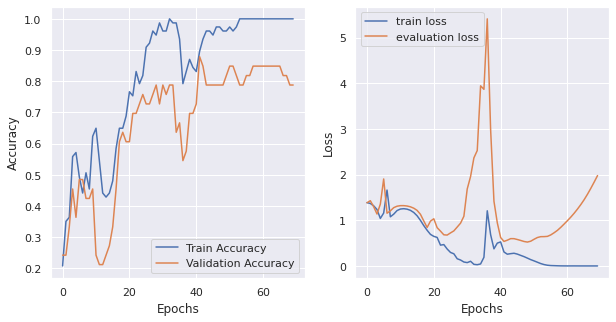

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy');
ax.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
print(np.max(history.history['sparse_categorical_accuracy']),np.max(history.history['val_sparse_categorical_accuracy']))

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/VGG19.h5')

In [ ]:
modelo = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Lenet5_Final.h5')